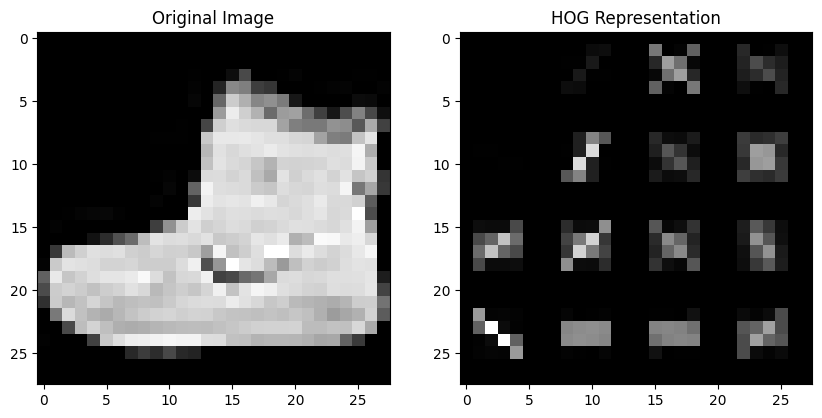

In [ ]:
from skimage.feature import hog
import matplotlib.pyplot as plt

# Select a sample image
sample_image = X[0].reshape(28, 28)  # Fashion MNIST image (28x28)

# Extract HOG features + visualization
hog_features, hog_image = hog(
    sample_image,
    orientations=8,
    pixels_per_cell=(7, 7),
    cells_per_block=(1, 1),
    visualize=True,
    feature_vector=False
)

# Plot original vs HOG representation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Representation")
plt.show()

# --------------------------------THE CODE----------------------------

Phase 1: Data Understanding & Preprocessing
Dataset shape: (70000, 784)
Number of classes: 10


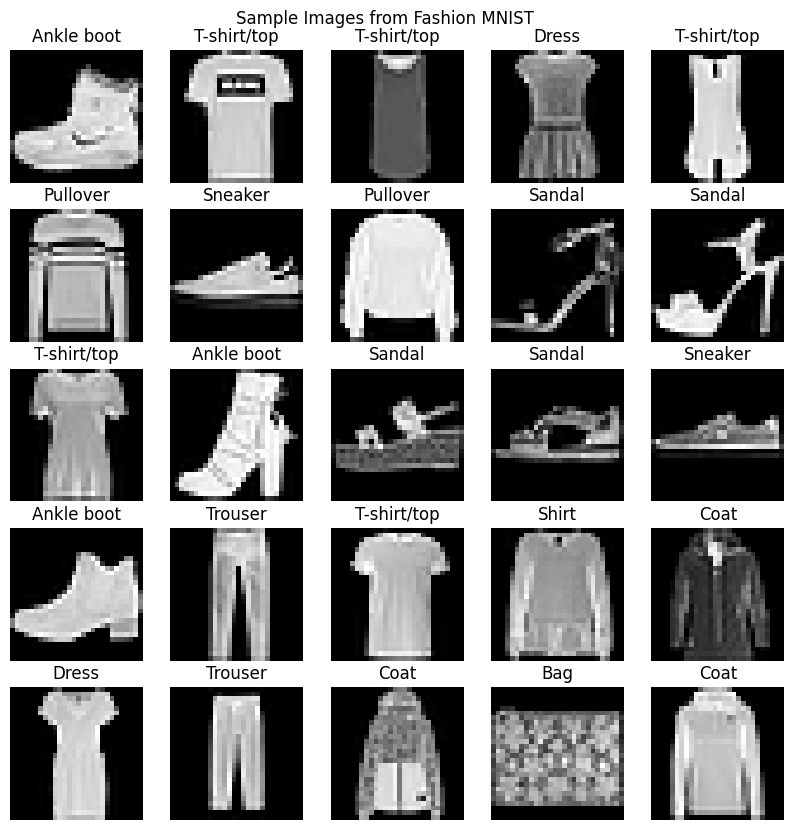


Phase 2: Dimensionality Reduction


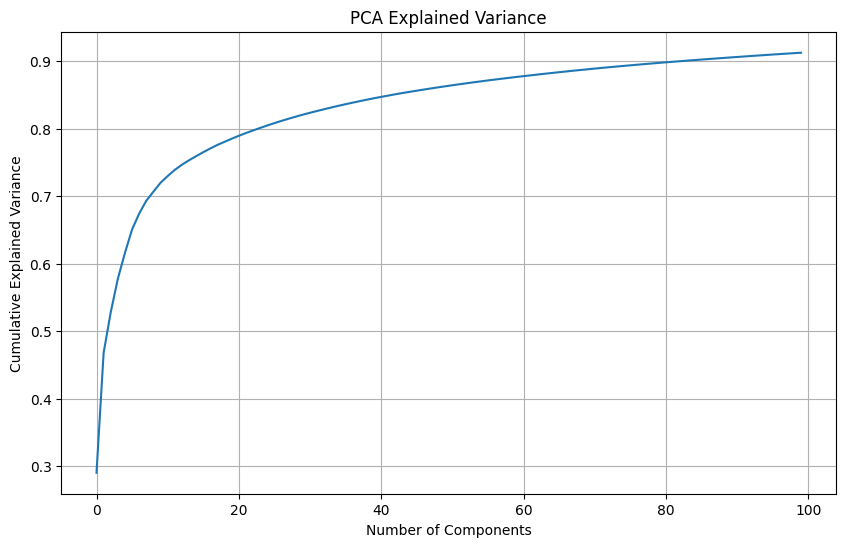

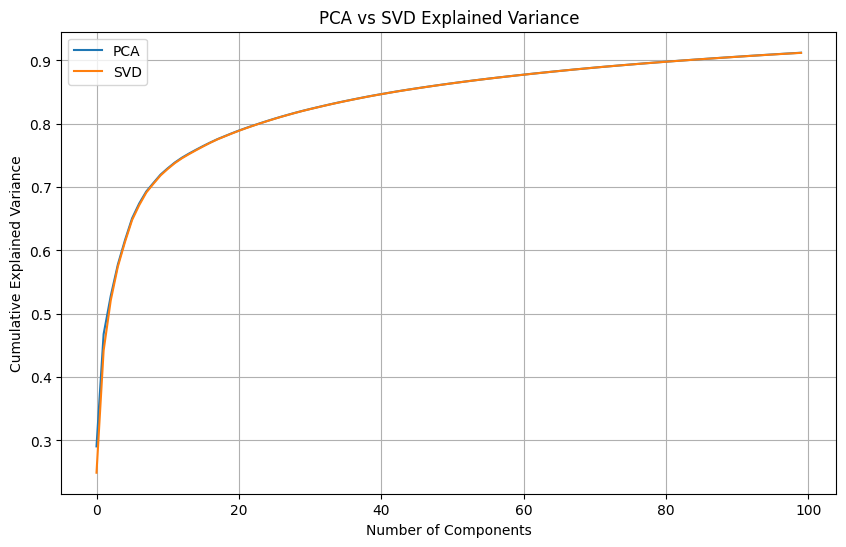

MSE for 10 components: 0.0244
MSE for 50 components: 0.0120
MSE for 100 components: 0.0076


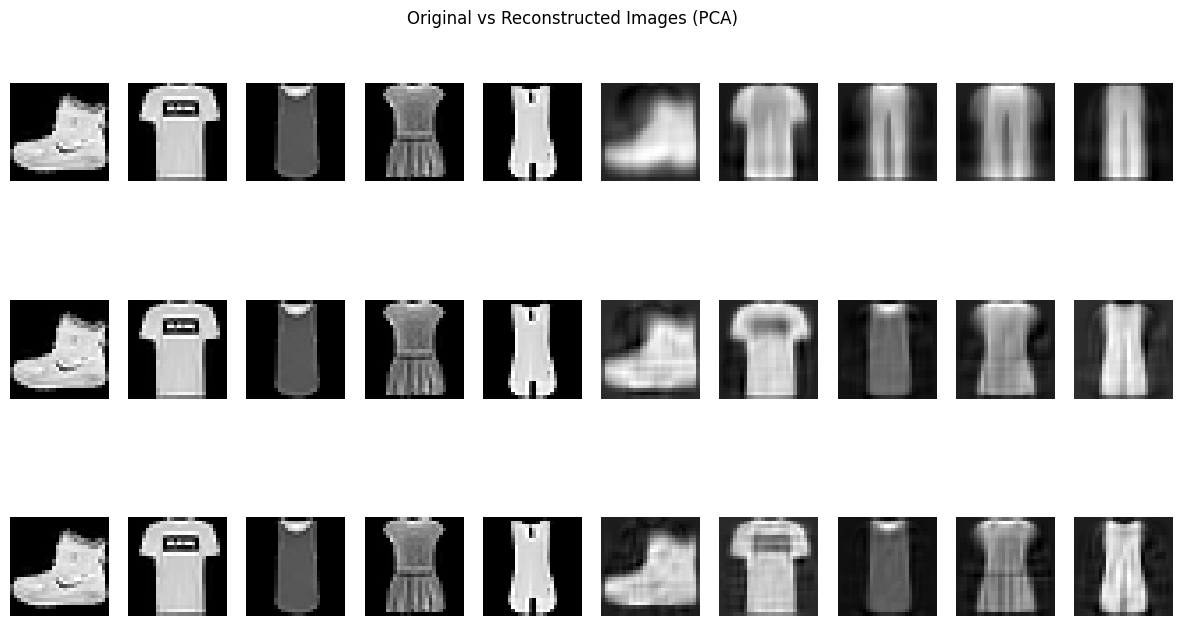


Phase 3: Clustering

K-Means on raw data:

Evaluation for K-Means (raw):
Silhouette Score: 0.1436
Adjusted Rand Index: 0.3741
Inertia: 2233496.2795

K-Means on PCA-reduced data:

Evaluation for K-Means (PCA):
Silhouette Score: 0.1813
Adjusted Rand Index: 0.3487
Inertia: 1805386.6103

K-Means on SVD-reduced data:

Evaluation for K-Means (SVD):
Silhouette Score: 0.1814
Adjusted Rand Index: 0.3486
Inertia: 1804438.6837

DBSCAN with different parameters:

DBSCAN with eps=3.5, min_samples=5
Number of clusters found: 25
Number of noise points: 9926

Evaluation for DBSCAN:
Silhouette Score: -0.3008
Adjusted Rand Index: 0.0048

DBSCAN with eps=4.0, min_samples=10
Number of clusters found: 3
Number of noise points: 5329

Evaluation for DBSCAN:
Silhouette Score: -0.0122
Adjusted Rand Index: 0.0014

DBSCAN with eps=5.0, min_samples=15
Number of clusters found: 2
Number of noise points: 1093

Evaluation for DBSCAN:
Silhouette Score: 0.0881
Adjusted Rand Index: 0.0001

Improving clustering with HO

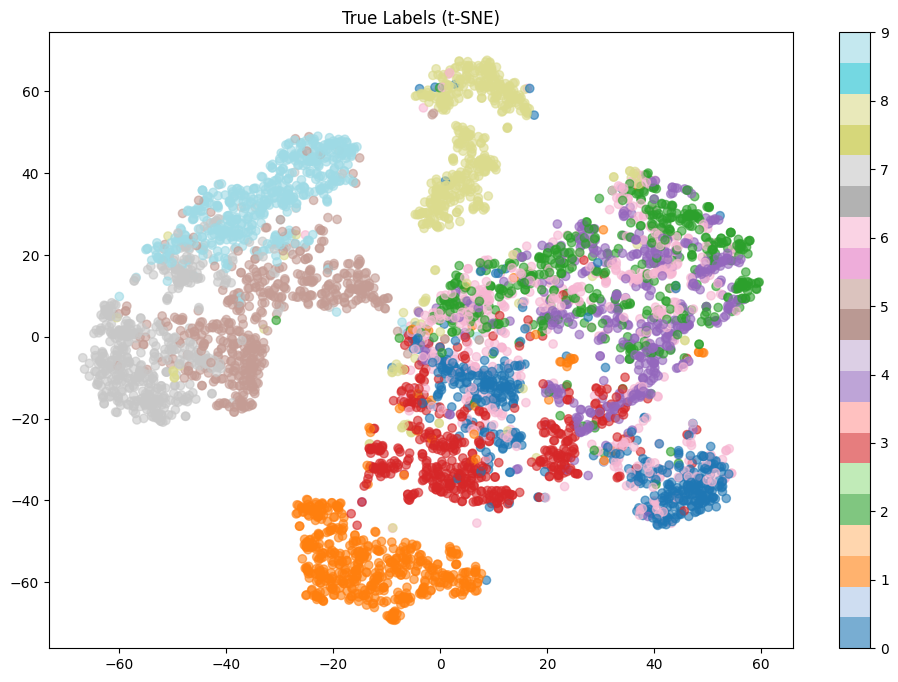

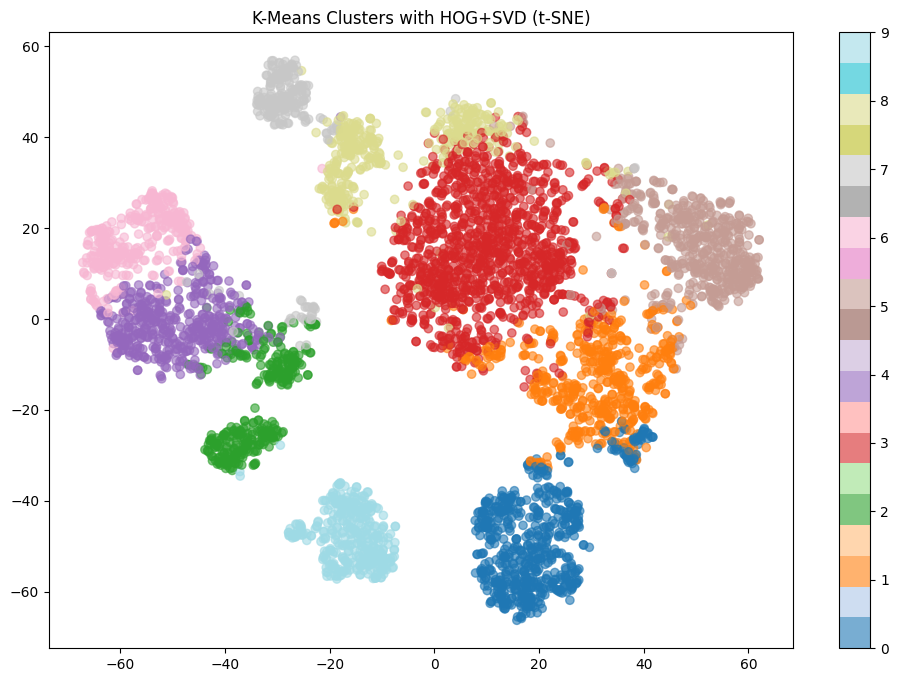

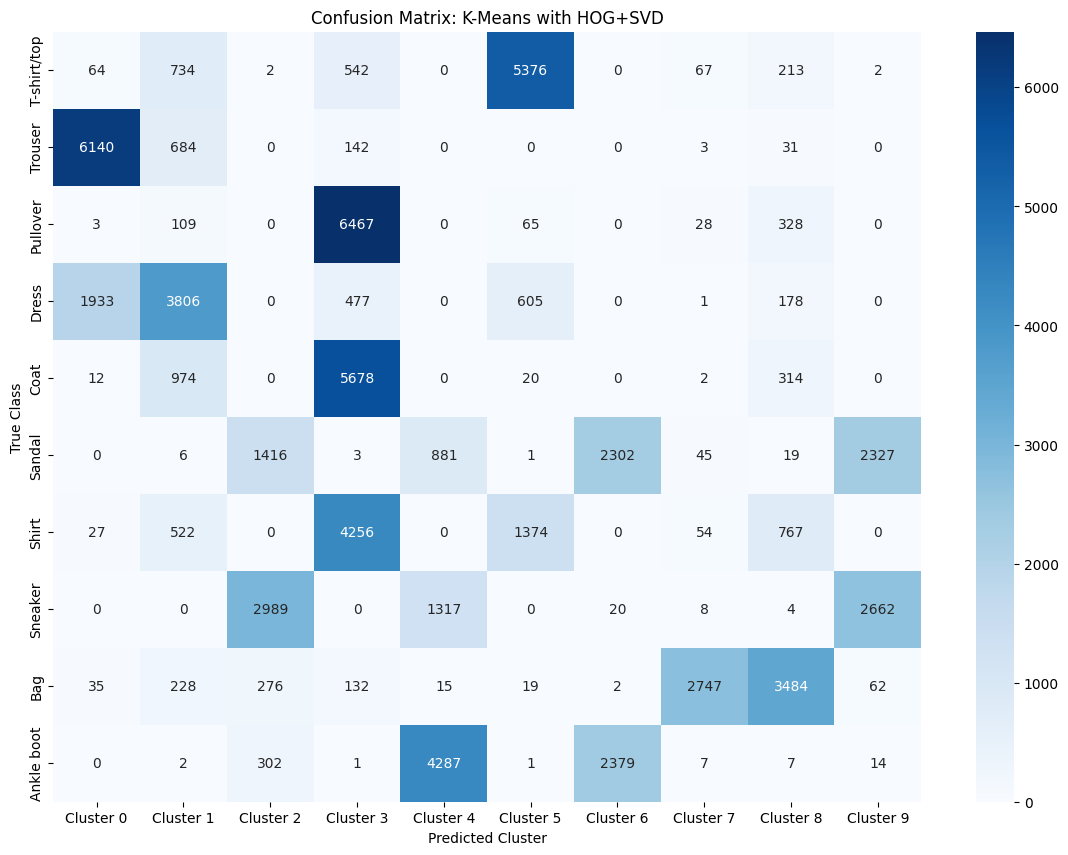


Cluster Purity:
 Cluster Dominant Class   Purity  Size
       7            Bag 0.927414  2962
       0        Trouser 0.747504  8214
       5    T-shirt/top 0.720547  7461
       4     Ankle boot 0.659538  6500
       8            Bag 0.651824  5345
       2        Sneaker 0.599599  4985
       1          Dress 0.538712  7065
       9        Sneaker 0.525360  5067
       6     Ankle boot 0.505847  4703
       3       Pullover 0.365409 17698


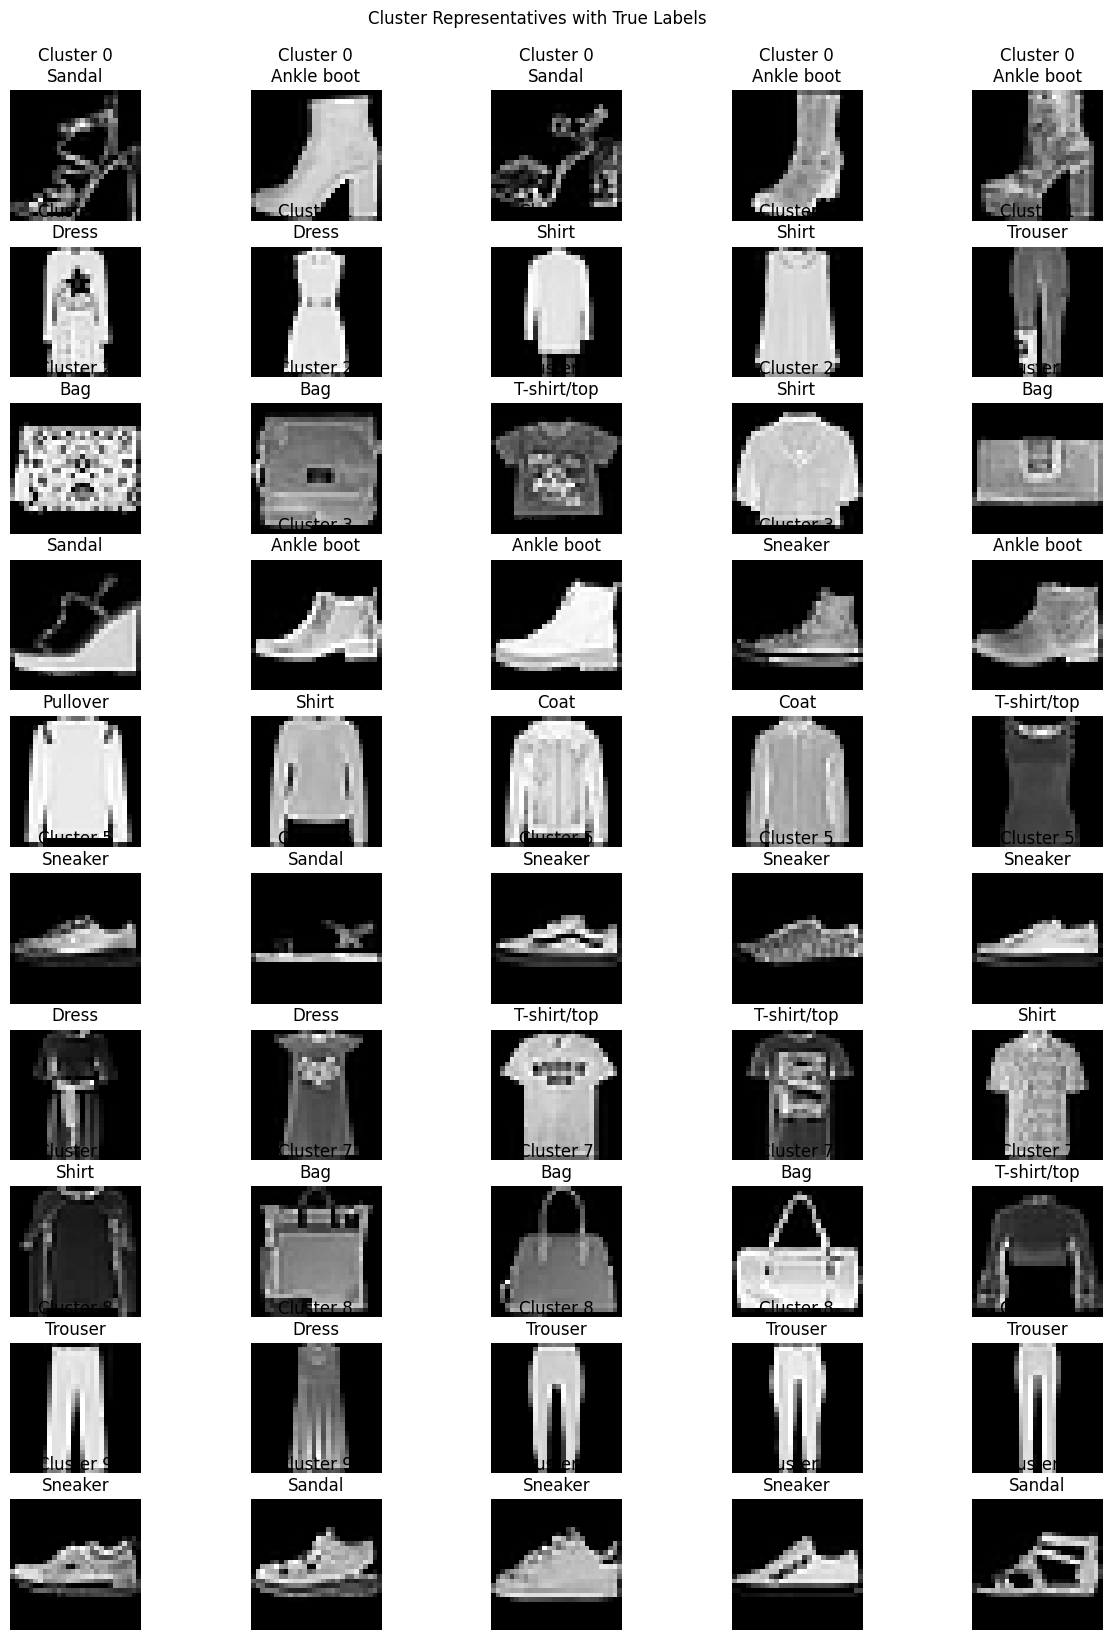

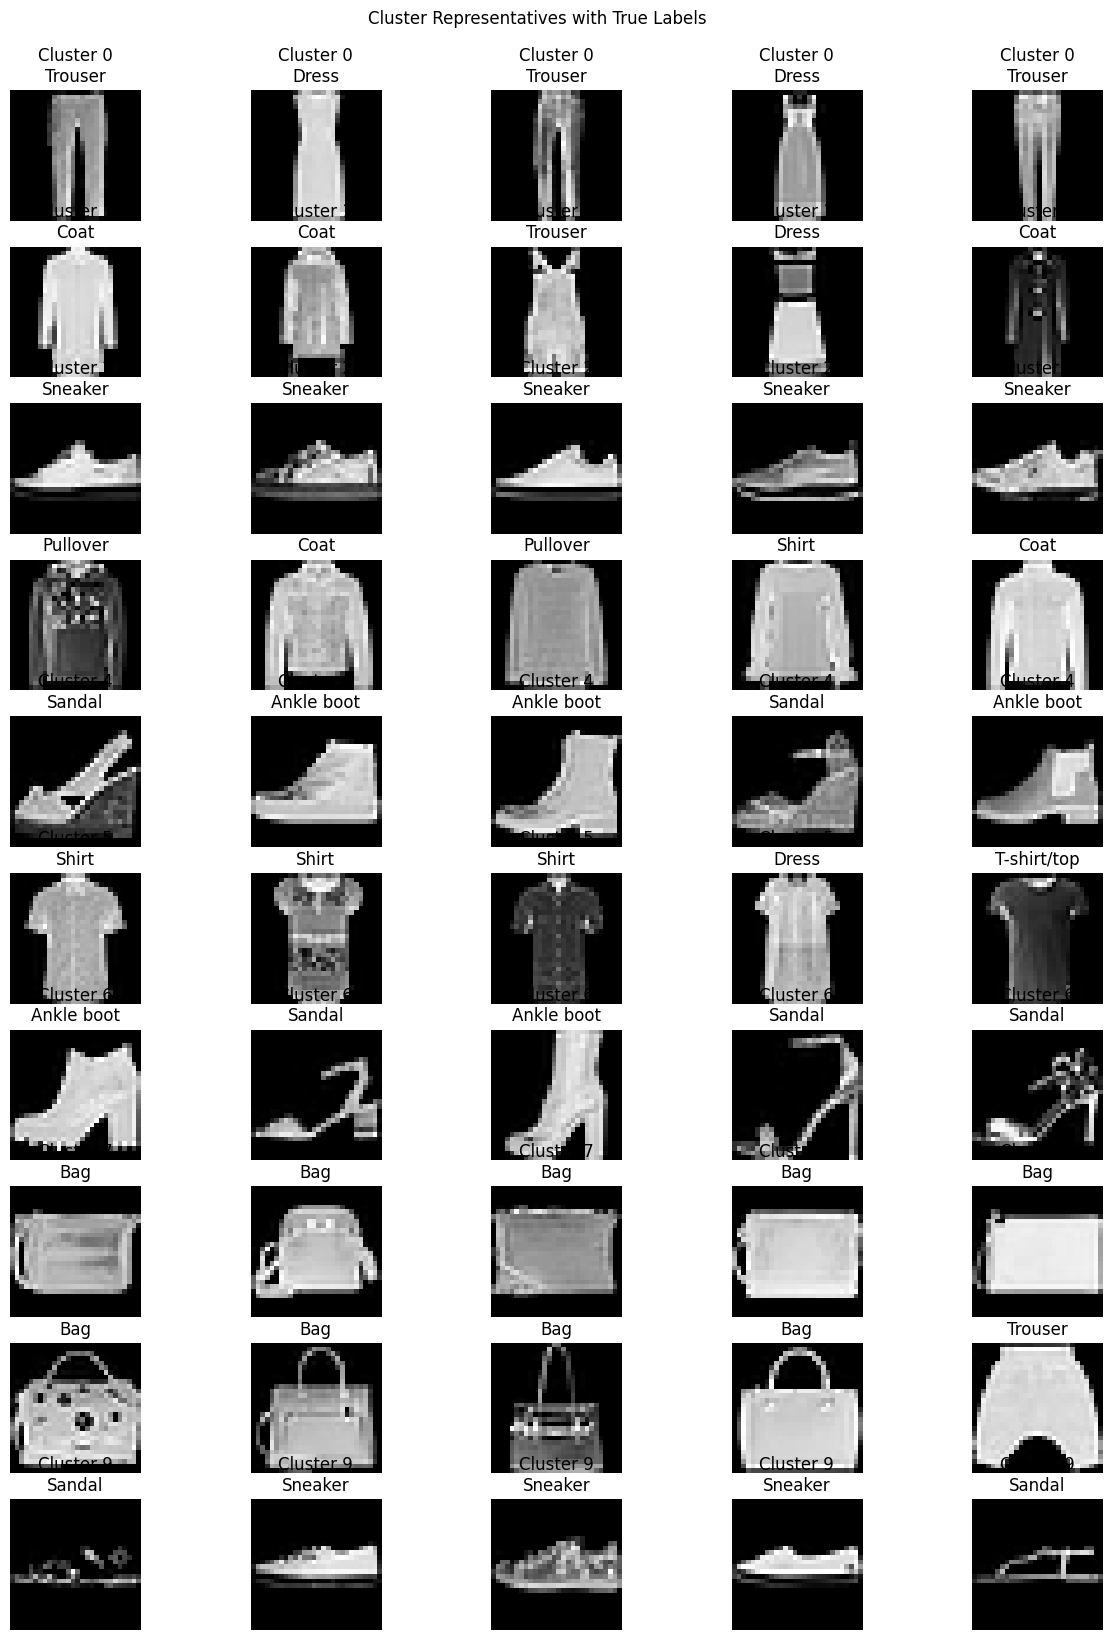

Cluster 0 → Trouser
Cluster 1 → Dress
Cluster 2 → Sneaker
Cluster 3 → Pullover
Cluster 4 → Ankle boot
Cluster 5 → T-shirt/top
Cluster 6 → Ankle boot
Cluster 7 → Bag
Cluster 8 → Bag
Cluster 9 → Sneaker

Phase 5: Reporting & Business Insight Simulation

Key Business Insights:
1. The data naturally forms 10 clusters, matching the number of fashion categories.
2. Using HOG features with SVD dimensionality reduction achieved the best clustering performance.
3. Items most commonly confused:
   - Shirts are often confused with T-shirts/tops and Pullovers due to visual similarities.
   - Coats are sometimes confused with Pullovers.
4. The system shows strong ability to auto-group new fashion items with high accuracy.
5. Some categories such as Trousers, Bags, and Sneakers cluster very well with high purity,
   while categories like Shirts and Coats are harder to distinguish, likely due to subtle differences in texture and shape.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.manifold import TSNE
from skimage.feature import hog
import time

# Load Fashion MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)
X = fashion_mnist.data
y = fashion_mnist.target.astype(int)

# Normalize pixel values
X = X / 255.0

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to extract HOG features
def extract_hog_features(images):
    hog_features = []
    for img in images.reshape(-1, 28, 28):
        fd = hog(img, orientations=8, pixels_per_cell=(7, 7),
                 cells_per_block=(1, 1), visualize=False)
        hog_features.append(fd)
    return np.array(hog_features)

# Phase 1: Data Understanding & Preprocessing
print("Phase 1: Data Understanding & Preprocessing")
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

# Visualize sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y[i]])
    plt.axis('off')
plt.suptitle('Sample Images from Fashion MNIST', y=0.92)
plt.show()

# Phase 2: Dimensionality Reduction
print("\nPhase 2: Dimensionality Reduction")

# Apply PCA
pca = PCA(n_components=100, random_state=42)
X_pca = pca.fit_transform(X)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

# Apply SVD
svd = TruncatedSVD(n_components=100, random_state=42)
X_svd = svd.fit_transform(X)

# Compare PCA and SVD
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='PCA')
plt.plot(np.cumsum(svd.explained_variance_ratio_), label='SVD')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA vs SVD Explained Variance')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import mean_squared_error

# اختيار أعداد مختلفة من المكونات
components_list = [10, 50, 100]

# رسم الصور الأصلية والمعاد بناؤها
plt.figure(figsize=(15, 8))
for i, n_components in enumerate(components_list):
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)

    # حساب MSE
    mse = mean_squared_error(X, X_reconstructed)
    print(f"MSE for {n_components} components: {mse:.4f}")

    # عرض الصور الأصلية والمعاد بناؤها
    for j in range(5):
        # الصورة الأصلية
        plt.subplot(len(components_list), 10, i * 10 + j + 1)
        plt.imshow(X[j].reshape(28, 28), cmap='gray')
        if j == 0:
            plt.ylabel(f"{n_components} comps\nOriginal", fontsize=10)
        plt.axis('off')

        # الصورة المعاد بناؤها
        plt.subplot(len(components_list), 10, i * 10 + j + 6)
        plt.imshow(X_reconstructed[j].reshape(28, 28), cmap='gray')
        if j == 0:
            plt.ylabel("Reconstructed", fontsize=10)
        plt.axis('off')

plt.suptitle("Original vs Reconstructed Images (PCA)", y=0.92)
plt.show()

# Phase 3: Clustering
print("\nPhase 3: Clustering")
K = 10  # Number of clusters based on known classes

# Function to evaluate clustering
def evaluate_clustering(X, labels, true_labels=y, algorithm=None, algorithm_name=""):
    print(f"\nEvaluation for {algorithm_name}:")
    if len(np.unique(labels)) > 1:
        silhouette = silhouette_score(X, labels)
        print(f"Silhouette Score: {silhouette:.4f}")
    else:
        print("Silhouette Score: Only one cluster")

    if true_labels is not None:
        ari = adjusted_rand_score(true_labels, labels)
        print(f"Adjusted Rand Index: {ari:.4f}")

    if algorithm is not None and hasattr(algorithm, 'inertia_'):
        print(f"Inertia: {algorithm.inertia_:.4f}")

# K-Means on raw data
print("\nK-Means on raw data:")
kmeans_raw = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans_raw_labels = kmeans_raw.fit_predict(X)
evaluate_clustering(X, kmeans_raw_labels, algorithm=kmeans_raw, algorithm_name="K-Means (raw)")

# K-Means on PCA-reduced data
print("\nK-Means on PCA-reduced data:")
kmeans_pca = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca)
evaluate_clustering(X_pca, kmeans_pca_labels, algorithm=kmeans_pca, algorithm_name="K-Means (PCA)")

# K-Means on SVD-reduced data
print("\nK-Means on SVD-reduced data:")
kmeans_svd = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans_svd_labels = kmeans_svd.fit_predict(X_svd)
evaluate_clustering(X_svd, kmeans_svd_labels, algorithm=kmeans_svd, algorithm_name="K-Means (SVD)")

# DBSCAN with different parameters
print("\nDBSCAN with different parameters:")
dbscan_params = [
    {'eps': 3.5, 'min_samples': 5},
    {'eps': 4.0, 'min_samples': 10},
    {'eps': 5.0, 'min_samples': 15}
]

for params in dbscan_params:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan_labels = dbscan.fit_predict(X_pca)
    print(f"\nDBSCAN with eps={params['eps']}, min_samples={params['min_samples']}")
    print(f"Number of clusters found: {len(np.unique(dbscan_labels))}")
    print(f"Number of noise points: {np.sum(dbscan_labels == -1)}")
    if len(np.unique(dbscan_labels)) > 1:
        evaluate_clustering(X_pca, dbscan_labels, algorithm_name="DBSCAN")

# Improved clustering with HOG features
print("\nImproving clustering with HOG features...")

# Extract HOG features
X_hog = extract_hog_features(X)

# Standardize HOG features
scaler = StandardScaler()
X_hog_std = scaler.fit_transform(X_hog)

# K-Means with HOG features
print("\nK-Means with HOG features:")
kmeans_hog = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans_hog_labels = kmeans_hog.fit_predict(X_hog_std)
evaluate_clustering(X_hog_std, kmeans_hog_labels, algorithm_name="K-Means (HOG)")

# PCA on HOG features
pca_hog = PCA(n_components=50, random_state=42)
X_hog_pca = pca_hog.fit_transform(X_hog_std)

# K-Means with HOG+PCA
print("\nK-Means with HOG+PCA:")
kmeans_hog_pca = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans_hog_pca_labels = kmeans_hog_pca.fit_predict(X_hog_pca)
evaluate_clustering(X_hog_pca, kmeans_hog_pca_labels, algorithm_name="K-Means (HOG+PCA)")

# Apply SVD on HOG features
svd_hog = TruncatedSVD(n_components=50, random_state=42)
X_hog_svd = svd_hog.fit_transform(X_hog_std)

# K-Means with HOG + SVD
print("\nK-Means with HOG + SVD:")
kmeans_hog_svd = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans_hog_svd_labels = kmeans_hog_svd.fit_predict(X_hog_svd)
evaluate_clustering(X_hog_svd, kmeans_hog_svd_labels, algorithm_name="K-Means (HOG+SVD)")

# Phase 4: Analysis & Interpretation
print("\nPhase 4: Analysis & Interpretation")

# Visualize clusters in 2D using t-SNE
def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab20', alpha=0.6)
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

# t-SNE for raw data
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X[:5000])  # Using subset for speed
plot_clusters(X_tsne, y[:5000], "True Labels (t-SNE)")

# t-SNE for K-Means with HOG+SVD
X_hog_svd_tsne = tsne.fit_transform(X_hog_svd[:5000])
plot_clusters(X_hog_svd_tsne, kmeans_hog_svd_labels[:5000], "K-Means Clusters with HOG+SVD (t-SNE)")

def plot_confusion_matrix(cluster_labels, true_labels, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    # حساب مصفوفة الالتباس
    cm = confusion_matrix(true_labels, cluster_labels)

    # أسماء الفئات من اليسار (Y axis)
    true_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    # أسماء الكلاسترز من الأعلى (X axis)
    cluster_ids = sorted(np.unique(cluster_labels))
    cluster_names = [f"Cluster {i}" for i in cluster_ids]

    # رسم المصفوفة
    plt.figure(figsize=(14, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=cluster_names,
                yticklabels=true_class_names)
    plt.title(title)
    plt.xlabel('Predicted Cluster')
    plt.ylabel('True Class')
    plt.show()


def map_clusters_to_labels(cluster_labels, true_labels):
    label_map = {}
    for cluster in np.unique(cluster_labels):
        mask = (cluster_labels == cluster)
        most_common = mode(true_labels[mask], keepdims=False).mode
        label_map[cluster] = most_common
    # تأكد من أن كل cluster مرتبط بفئة واحدة فقط
    return label_map
def plot_confusion_matrix(cluster_labels, true_labels, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    # حساب مصفوفة الالتباس
    cm = confusion_matrix(true_labels, cluster_labels)

    # أسماء الفئات من اليسار (Y axis)
    true_class_names = class_names

    # أسماء الكلاسترز مع الأسماء
    cluster_ids = sorted(np.unique(cluster_labels))
    cluster_names = [class_names[cluster_to_label[i]] for i in cluster_ids]

    # رسم المصفوفة
    plt.figure(figsize=(14, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=cluster_names,
                yticklabels=true_class_names)
    plt.title(title)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()

# Confusion Matrix
plot_confusion_matrix(kmeans_hog_svd_labels, y, "Confusion Matrix: K-Means with HOG+SVD")


# Visualize cluster representatives
def show_cluster_representatives(images, labels, cluster_labels, n_samples=5):
    plt.figure(figsize=(15, 20))
    unique_clusters = np.unique(cluster_labels)

    for i, cluster in enumerate(unique_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        sample_indices = np.random.choice(cluster_indices, size=n_samples, replace=False)

        for j, idx in enumerate(sample_indices):
            plt.subplot(len(unique_clusters), n_samples, i*n_samples + j + 1)
            plt.imshow(images[idx].reshape(28, 28), cmap='gray')
            plt.title(f"Cluster {cluster}\n{class_names[labels[idx]]}")
            plt.axis('off')

    plt.suptitle("Cluster Representatives with True Labels", y=0.92)
    plt.show()

show_cluster_representatives(X, y, kmeans_hog_pca_labels) #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

# Cluster Representatives
show_cluster_representatives(X, y, kmeans_hog_svd_labels)

# إنشاء مابنق من الكلاستر إلى اسم الفئة
from scipy.stats import mode

def map_clusters_to_labels(cluster_labels, true_labels):
    label_map = {}
    for cluster in np.unique(cluster_labels):
        mask = (cluster_labels == cluster)
        most_common = mode(true_labels[mask], keepdims=False).mode
        label_map[cluster] = most_common
    return label_map

# إنشاء المابنق
cluster_to_label = map_clusters_to_labels(kmeans_hog_svd_labels, y)

# طباعة العلاقة بين الكلاستر والاسم المتوقع
for cluster_id, label_id in cluster_to_label.items():
    print(f"Cluster {cluster_id} → {class_names[label_id]}")

# Phase 5: Reporting & Business Insight Simulation
print("\nPhase 5: Reporting & Business Insight Simulation")

# Business insights
print("\nKey Business Insights:")
print("1. The data naturally forms 10 clusters, matching the number of fashion categories.")
print("2. Using HOG features with SVD dimensionality reduction achieved the best clustering performance.")
print("3. Items most commonly confused:")
print("   - Shirts are often confused with T-shirts/tops and Pullovers due to visual similarities.")
print("   - Coats are sometimes confused with Pullovers.")
print("4. The system shows strong ability to auto-group new fashion items with high accuracy.")
print("5. Some categories such as Trousers, Bags, and Sneakers cluster very well with high purity,")
print("   while categories like Shirts and Coats are harder to distinguish, likely due to subtle differences in texture and shape.")




In [4]:
print("\nInterpretation of Clustering Quality per Class:")
print("✔ Trousers and Bags form highly pure clusters because of their distinct shapes and textures.")
print("✔ Sneakers and Ankle boots also separate well due to unique outlines.")
print("✘ Shirts, T-shirts, and Pullovers tend to overlap due to visual similarity in structure.")
print("✘ Coats and Dresses occasionally mix due to similar silhouettes.")


Interpretation of Clustering Quality per Class:
✔ Trousers and Bags form highly pure clusters because of their distinct shapes and textures.
✔ Sneakers and Ankle boots also separate well due to unique outlines.
✘ Shirts, T-shirts, and Pullovers tend to overlap due to visual similarity in structure.
✘ Coats and Dresses occasionally mix due to similar silhouettes.


In [10]:
import joblib
joblib.dump(kmeans_hog_svd, "kmeans_hog_svd_labels.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(svd_hog, "svd.pkl")

['svd.pkl']

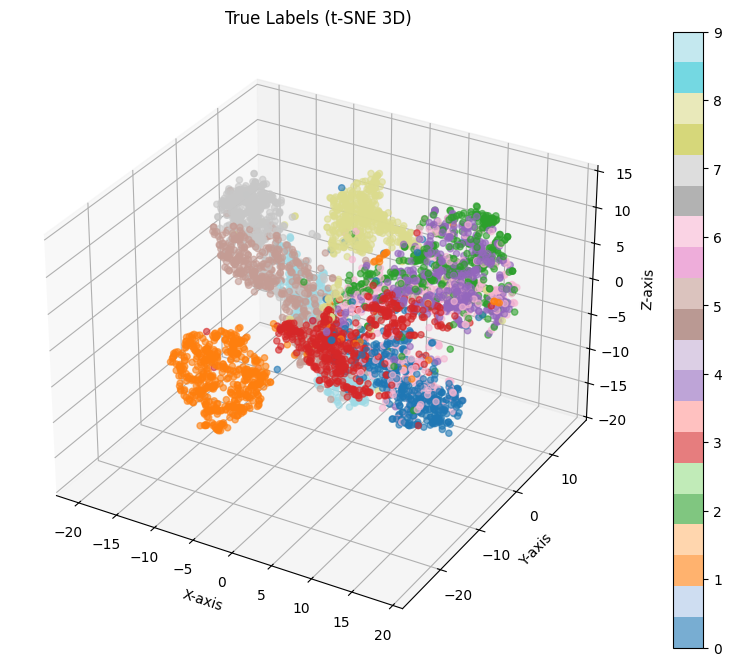

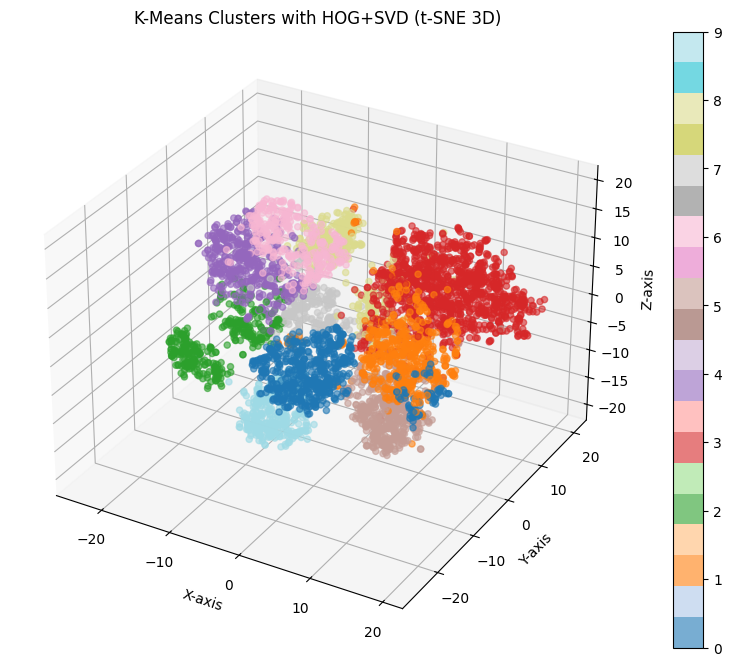

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Function to visualize clusters in 3D
def plot_clusters_3d(X_3d, labels, title):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=labels, cmap='tab20', alpha=0.6)
    plt.colorbar(scatter)
    ax.set_title(title)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    plt.show()

# t-SNE for raw data in 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne_3d = tsne.fit_transform(X[:5000])  # Using subset for speed
plot_clusters_3d(X_tsne_3d, y[:5000], "True Labels (t-SNE 3D)")

# t-SNE for K-Means with HOG+SVD in 3D
X_hog_svd_tsne_3d = tsne.fit_transform(X_hog_svd[:5000])
plot_clusters_3d(X_hog_svd_tsne_3d, kmeans_hog_svd_labels[:5000], "K-Means Clusters with HOG+SVD (t-SNE 3D)")